In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

def load_replay_buffer(path):
  with open(path, 'rb') as f:
      buffer_dict = pickle.load(f)
  return buffer_dict

def plot_replay_buffer(buffer_dict, num_samples=1000):
  obs = buffer_dict['obs_buf'][:buffer_dict['size']]
  act = buffer_dict['act_buf'][:buffer_dict['size']]
  obs2 = buffer_dict['obs2_buf'][:buffer_dict['size']]

  # Randomly sample if there are too many points
  if obs.shape[0] > num_samples:
      indices = np.random.choice(obs.shape[0], num_samples, replace=False)
      obs = obs[indices]
      act = act[indices]
      obs2 = obs2[indices]

  # Plot observations
  plt.figure(figsize=(15, 5))
  plt.subplot(131)
  plt.title('Observations')
  for i in range(obs.shape[1]):
      plt.plot(obs[:, i], label=f'obs_{i}')
  plt.legend()

  # Plot actions
  plt.subplot(132)
  plt.title('Actions')
  for i in range(act.shape[1]):
      plt.plot(act[:, i], label=f'act_{i}')
  plt.legend()

  # Plot next observations
  plt.subplot(133)
  plt.title('Next Observations')
  for i in range(obs2.shape[1]):
      plt.plot(obs2[:, i], label=f'obs2_{i}')
  plt.legend()

  plt.tight_layout()
  plt.show()

def plot_obs_action_obs2(buffer_dict, num_samples=1000):
  obs = buffer_dict['obs_buf'][:buffer_dict['size']]
  act = buffer_dict['act_buf'][:buffer_dict['size']]
  obs2 = buffer_dict['obs2_buf'][:buffer_dict['size']]

  # Randomly sample if there are too many points
  if obs.shape[0] > num_samples:
      indices = np.random.choice(obs.shape[0], num_samples, replace=False)
      obs = obs[indices]
      act = act[indices]
      obs2 = obs2[indices]

  # Plot obs vs action vs obs2
  plt.figure(figsize=(15, 5))
  for i in range(obs.shape[1]):
      plt.subplot(1, obs.shape[1], i+1)
      plt.title(f'Dimension {i}')
      plt.scatter(obs[:, i], act[:, 0], c='blue', label='obs vs action', alpha=0.5)
      plt.scatter(obs[:, i], obs2[:, i], c='red', label='obs vs obs2', alpha=0.5)
      plt.xlabel(f'obs_{i}')
      plt.ylabel('action / obs2')
      plt.legend()

  plt.tight_layout()
  plt.show()
 

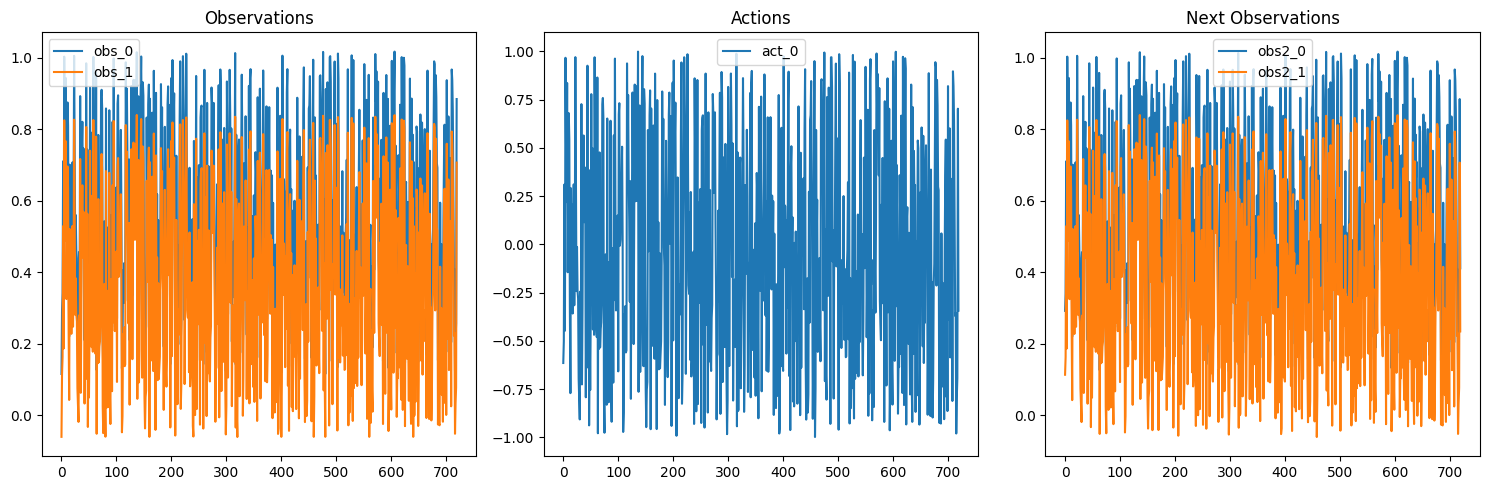

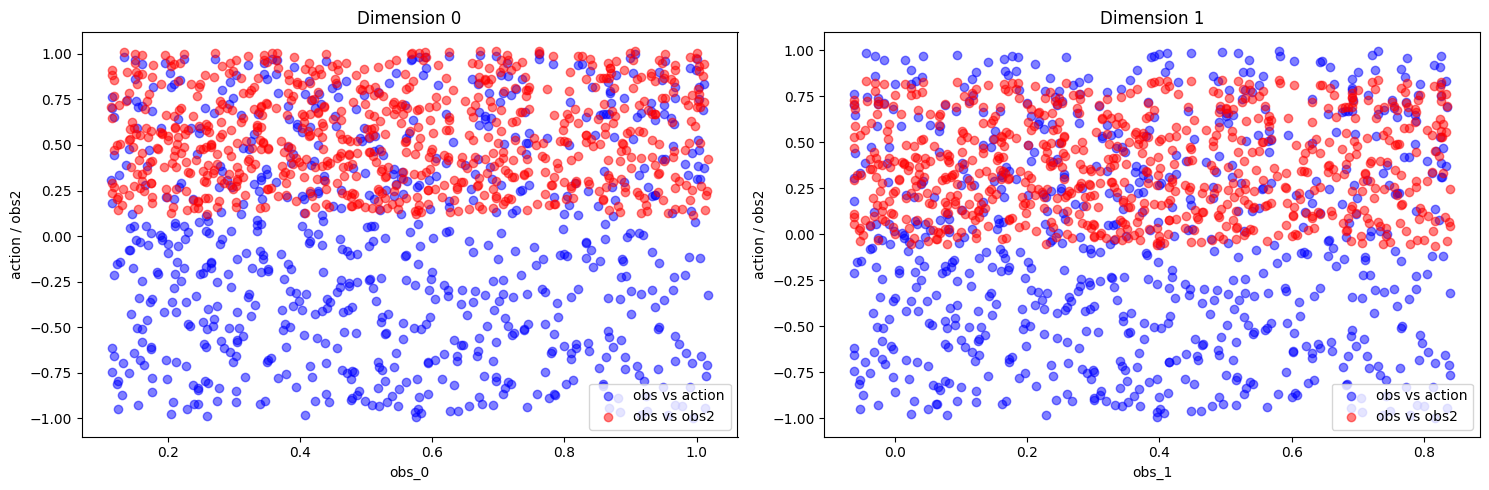

In [2]:
# Specify the path to your replay buffer file
buffer_path = os.path.join('real','latest_checkpoint', 'replay_buffer.pkl')

# Load the replay buffer
buffer_dict = load_replay_buffer(buffer_path)

# Plot the replay buffer contents
plot_replay_buffer(buffer_dict)

# Plot obs vs action vs obs2
plot_obs_action_obs2(buffer_dict)